# DS 542 - 2025 Fall - Homework 3

Solve the following problems using PyTorch and then submit in [Gradescope](https://www.gradescope.com/courses/1071076).


Do not use any PyTorch module classes for any of the problems.
Tensors and functions such as `tensor.log` and automatic gradient tracking are allowed.

## Problem 1 - Compute Roots of a Function

The roots of a function are inputs that make that function zero.
Use gradient descent to solve for both roots of $f(x) = x^2 - 4x + 1$.

Save the two roots in a variable `roots` and print it.

Hint: The discussion on 9/17 will focus on similar problems.

In [3]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [4]:
def f(x):
    return x * x - 4 * x + 1

In [9]:
def find_roots(x0, lr = 0.05, steps = 200):
    x = torch.tensor([x0], dtype = torch.float32, requires_grad = True)
    for i in range(steps):
        y = f(x)
        loss = y**2
        loss.backward()
        with torch.no_grad():
            x -= lr * x.grad
            x.grad.zero_()
    return x.item()

root1 = find_roots(-1)
root2 = find_roots(5)

In [10]:
# YOUR CHANGES HERE

roots = [root1, root2]
roots

[3.732050895690918, 0.2679491937160492]

## Problem 2 - Implement Logistic Regression

Implement logistic regression in PyTorch to predict the outcome column of the Pima Indians Diabetes data set.

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/refs/heads/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
input_df = df.drop(columns=["Outcome"])
target = df["Outcome"]

### Part A - Setup the Logistic Regression and Prediction Function

In [21]:
X = torch.tensor(input_df.values, dtype = torch.float32)
X = (X - X.mean(dim=0)) / X.std(dim=0)
y = torch.tensor(target.values, dtype = torch.float32).view(-1, 1)

torch.manual_seed(1)
w = torch.randn((X.shape[1], 1), dtype=torch.float32) * 0.01
w.requires_grad_()
b = torch.zeros(1, dtype = torch.float32, requires_grad = True)

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def predict(X):
    return sigmoid(X @ w + b)

### Part B - Write a Function Calculating the Loss for this Logistic Regression

In [22]:
def loss_fn(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

### Part C - Optimize the Logistic Regression Parameters using Gradient Descent

In [29]:
lr = 0.01
steps = 100

for step in range(steps):
    y_pred = predict(X)
    loss = loss_fn(y_pred, y)

    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if step % 10 == 0:
        print(f"Step {step}, Loss = {loss.item()}")


Step 0, Loss = 0.48071837425231934
Step 10, Loss = 0.48053398728370667
Step 20, Loss = 0.48035359382629395
Step 30, Loss = 0.4801771640777588
Step 40, Loss = 0.48000457882881165
Step 50, Loss = 0.47983574867248535
Step 60, Loss = 0.47967055439949036
Step 70, Loss = 0.47950878739356995
Step 80, Loss = 0.47935056686401367
Step 90, Loss = 0.4791957437992096


### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your logistic regression's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.

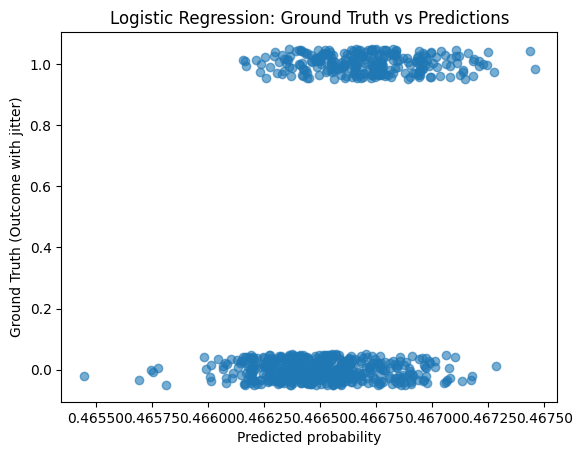

In [35]:
with torch.no_grad():
    y_pred = predict(X)

plt.scatter(y_pred.numpy(), (y + jitter).numpy(), alpha=0.6)
plt.xlabel("Predicted probability")
plt.ylabel("Ground Truth (Outcome with jitter)")
plt.title("Logistic Regression: Ground Truth vs Predictions")
plt.show()


## Problem 3 - Implement a Shallow Neural Network

Implement a neural network with one hidden layer to predict the outcome column of the Pima Indians Diabetes data set.

### Part A - Setup the Neural Network and Prediction Function

In [32]:
import torch

X = torch.tensor(input_df.values, dtype=torch.float32)
X = (X - X.mean(dim=0)) / X.std(dim=0)
y = torch.tensor(target.values, dtype=torch.float32).view(-1, 1)

torch.manual_seed(0)
hidden_size = 16
W1 = torch.randn((X.shape[1], hidden_size), dtype=torch.float32) * 0.01
b1 = torch.zeros(hidden_size, dtype=torch.float32)
W2 = torch.randn((hidden_size, 1), dtype=torch.float32) * 0.01
b2 = torch.zeros(1, dtype=torch.float32)

for p in [W1, b1, W2, b2]:
    p.requires_grad_()

def sigmoid(z): return 1 / (1 + torch.exp(-z))

def predict(X):
    h = torch.tanh(X @ W1 + b1)
    return sigmoid(h @ W2 + b2)

### Part B - Write a Function Calculating the Loss for the Neural Network

In [33]:
def loss_fn(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

### Part C - Optimize the Neural Network with Gradient Descent

In [34]:
lr = 0.01
steps = 100

for step in range(steps):
    y_pred = predict(X)
    loss = loss_fn(y_pred, y)

    loss.backward()

    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

    for p in [W1, b1, W2, b2]:
        p.grad.zero_()

    if step % 10 == 0:
        print(f"Step {step}, Loss = {loss.item():.4f}")


Step 0, Loss = 0.6932
Step 10, Loss = 0.6910
Step 20, Loss = 0.6888
Step 30, Loss = 0.6868
Step 40, Loss = 0.6848
Step 50, Loss = 0.6830
Step 60, Loss = 0.6812
Step 70, Loss = 0.6795
Step 80, Loss = 0.6779
Step 90, Loss = 0.6764


### Part D - Plot Ground Truth vs Predicted Probabilities

Make a scatter plot where your neural network's predictions for each row of the data set are the x-axis, and the actual outcome is the y axis.

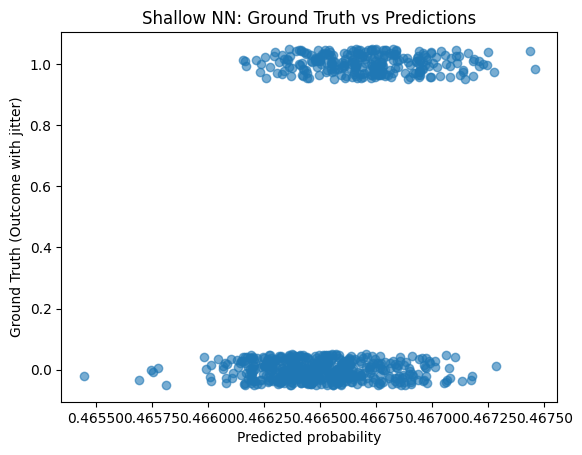

In [36]:
with torch.no_grad():
    y_pred = predict(X)

plt.scatter(y_pred.numpy(), (y + jitter).numpy(), alpha=0.6)
plt.xlabel("Predicted probability")
plt.ylabel("Ground Truth (Outcome with jitter)")
plt.title("Shallow NN: Ground Truth vs Predictions")
plt.show()
